In [24]:
import pandas as pd

# Load your file
df = pd.read_csv("data/only_Q_outputs/combined/combined_pca_components.csv")

# Find subjects who have BOTH "b" and "after" rows
subjects_with_b = df[df["timepoint"] == "b"]["Subject_Code"].unique()
subjects_with_after = df[df["timepoint"] == "after"]["Subject_Code"].unique()

valid_subjects = set(subjects_with_b).intersection(set(subjects_with_after))

# Filter the dataframe
df_valid = df[df["Subject_Code"].isin(valid_subjects)]

# Select the FIRST b row and FIRST after row for each subject
df_b = (df_valid[df_valid["timepoint"] == "b"]
        .drop_duplicates(subset="Subject_Code")
        .set_index("Subject_Code"))

df_after = (df_valid[df_valid["timepoint"] == "after"]
            .drop_duplicates(subset="Subject_Code")
            .set_index("Subject_Code"))

# Compute PC changes
pc_cols = [col for col in df.columns if col.startswith("PC")]

change_df_pca = pd.DataFrame(index=df_b.index)

for col in pc_cols:
    change_df_pca[f"{col}_change"] = df_after[col] - df_b[col]

change_df_pca = change_df_pca.reset_index()

# Drop any rows with missing PC values
change_df_pca = change_df_pca.dropna()

print(change_df_pca.head())
print("Subjects kept:", len(change_df_pca))


  Subject_Code  PC1_change  PC2_change  PC3_change  PC4_change  PC5_change  \
0        NT005   -2.170695    1.080874    0.811725    0.850977   -2.228837   
1        NT002    1.052925   -0.904483   -0.922608    0.058625    0.417782   
2        NT001    1.749463    1.028119    1.622107    0.932883   -0.738206   
3        NT007   -8.505138   -2.568097    1.796438    1.831703   -0.637062   
4        CT004    2.779793    1.680384    1.102924   -0.252185   -0.466372   

   PC6_change  PC7_change  PC8_change  PC9_change  PC10_change  PC11_change  \
0   -1.140074   -0.581321   -0.818161   -0.719271     0.083804    -1.357053   
1   -0.328281   -0.597292   -1.116978   -1.938419     0.030117     0.379133   
2   -0.286147    0.114735    1.551370   -1.811160     1.177618    -0.183981   
3   -2.673381    0.299302   -1.004728   -0.564972    -1.827933     1.044603   
4    0.839762    0.826618    0.040132   -0.788001     0.062258     0.087310   

   PC12_change  PC13_change  
0    -0.108180     1.33802

In [13]:
import pandas as pd

# Load session 1 and session 2 files
ses1 = pd.read_csv("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_map_ses1_labeled_YEO.csv")
ses2 = pd.read_csv("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_map_ses2_labeled_YEO.csv")

# Rename subject column
ses1 = ses1.rename(columns={"Unnamed: 0": "Subject_Code"})
ses2 = ses2.rename(columns={"Unnamed: 0": "Subject_Code"})

# --- CLEAN SUBJECT NAMES ---
ses1["Subject"] = ses1["Subject_Code"].str.split("_").str[0]
ses2["Subject"] = ses2["Subject_Code"].str.split("_").str[0]

# 1. Find subjects in BOTH sessions
subjects_ses1 = set(ses1["Subject"])
subjects_ses2 = set(ses2["Subject"])
valid_subjects = subjects_ses1.intersection(subjects_ses2)

# 2. Keep only valid subjects
ses1_valid = ses1[ses1["Subject"].isin(valid_subjects)].set_index("Subject")
ses2_valid = ses2[ses2["Subject"].isin(valid_subjects)].set_index("Subject")

# 3. DC columns
dc_cols = [col for col in ses2.columns if col.startswith("DC")]

# 4. Compute ses2 - ses1
change_df = pd.DataFrame(index=ses1_valid.index)

for col in dc_cols:
    change_df[f"{col}_change"] = ses2_valid[col] - ses1_valid[col]

# 5. Reset index so Subject becomes a column again
change_df = change_df.reset_index()

print(change_df.head())
print("Final number of subjects:", len(change_df))


  Subject  DC1_change  DC2_change  DC3_change  DC4_change  DC5_change  \
0   CT003    0.034764   -0.035311    0.041078    0.015619    0.012503   
1   CT007   -0.062667   -0.013212   -0.046078    0.007835    0.048400   
2   CT010    0.006035   -0.008680   -0.010386   -0.034301    0.018451   
3   CT012    0.028971    0.046479   -0.003835   -0.013847   -0.039679   
4   CT013   -0.029286    0.022308   -0.029230   -0.001955   -0.007944   

   DC6_change  DC7_change  DC8_change  DC9_change  ...  DC29_change  \
0    0.002721    0.002761   -0.008004   -0.010981  ...    -0.006079   
1    0.000303   -0.002294   -0.020450    0.013133  ...     0.005111   
2    0.035536    0.002275    0.004405    0.015892  ...     0.004272   
3    0.008101    0.009264   -0.028726   -0.005569  ...     0.012501   
4    0.007916   -0.000847    0.015974    0.000881  ...     0.007024   

   DC30_change  DC31_change  DC32_change  DC33_change  DC34_change  \
0    -0.001754    -0.000682    -0.007489    -0.001558     0.0024

In [14]:
import pandas as pd

### --- 1. Load & prepare fMRI change dataframe --- ###
ses1 = pd.read_csv("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_map_ses1_labeled_YEO.csv")
ses2 = pd.read_csv("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_map_ses2_labeled_YEO.csv")

ses1 = ses1.rename(columns={"Unnamed: 0": "Subject_Code"})
ses2 = ses2.rename(columns={"Unnamed: 0": "Subject_Code"})

# Clean subject names (remove ses1/ses2 suffix)
ses1["Subject"] = ses1["Subject_Code"].str.split("_").str[0]
ses2["Subject"] = ses2["Subject_Code"].str.split("_").str[0]

# Find subjects in both
valid_ses_subs = set(ses1["Subject"]).intersection(set(ses2["Subject"]))

# Filter
ses1_valid = ses1[ses1["Subject"].isin(valid_ses_subs)].set_index("Subject")
ses2_valid = ses2[ses2["Subject"].isin(valid_ses_subs)].set_index("Subject")

# DC columns
dc_cols = [col for col in ses2.columns if col.startswith("DC")]

# Compute ses2 - ses1
fmri_change_df = pd.DataFrame(index=ses1_valid.index)
for col in dc_cols:
    fmri_change_df[f"{col}_change"] = ses2_valid[col] - ses1_valid[col]
fmri_change_df = fmri_change_df.reset_index()  # restore Subject column


### --- 2. Load & prepare questionnaire change dataframe --- ###
df = pd.read_csv("data/only_Q_outputs/combined/combined_pca_components.csv")

subjects_with_b = df[df["timepoint"] == "b"]["Subject_Code"].unique()
subjects_with_after = df[df["timepoint"] == "after"]["Subject_Code"].unique()
valid_q_subs = set(subjects_with_b).intersection(set(subjects_with_after))

df_valid = df[df["Subject_Code"].isin(valid_q_subs)]

df_b = (df_valid[df_valid["timepoint"] == "b"]
        .drop_duplicates(subset="Subject_Code")
        .set_index("Subject_Code"))

df_after = (df_valid[df_valid["timepoint"] == "after"]
            .drop_duplicates(subset="Subject_Code")
            .set_index("Subject_Code"))

pc_cols = [col for col in df.columns if col.startswith("PC")]

q_change_df = pd.DataFrame(index=df_b.index)
for col in pc_cols:
    q_change_df[f"{col}_change"] = df_after[col] - df_b[col]

q_change_df = q_change_df.reset_index().dropna()
q_change_df = q_change_df.rename(columns={"Subject_Code": "Subject"})


### --- 3. MERGE BOTH DATAFRAMES --- ###
merged_df = pd.merge(fmri_change_df, q_change_df, on="Subject", how="inner")

print(merged_df.head())
print("Final merged subjects:", len(merged_df))


  Subject  DC1_change  DC2_change  DC3_change  DC4_change  DC5_change  \
0   CT003    0.034764   -0.035311    0.041078    0.015619    0.012503   
1   CT007   -0.062667   -0.013212   -0.046078    0.007835    0.048400   
2   CT010    0.006035   -0.008680   -0.010386   -0.034301    0.018451   
3   CT012    0.028971    0.046479   -0.003835   -0.013847   -0.039679   
4   CT013   -0.029286    0.022308   -0.029230   -0.001955   -0.007944   

   DC6_change  DC7_change  DC8_change  DC9_change  ...  PC4_change  \
0    0.002721    0.002761   -0.008004   -0.010981  ...   -1.193223   
1    0.000303   -0.002294   -0.020450    0.013133  ...   -0.344785   
2    0.035536    0.002275    0.004405    0.015892  ...    3.112675   
3    0.008101    0.009264   -0.028726   -0.005569  ...    0.399681   
4    0.007916   -0.000847    0.015974    0.000881  ...    1.024913   

   PC5_change  PC6_change  PC7_change  PC8_change  PC9_change  PC10_change  \
0    0.479432    0.005948    0.266546    1.013694   -0.127120 

KeyboardInterrupt: 

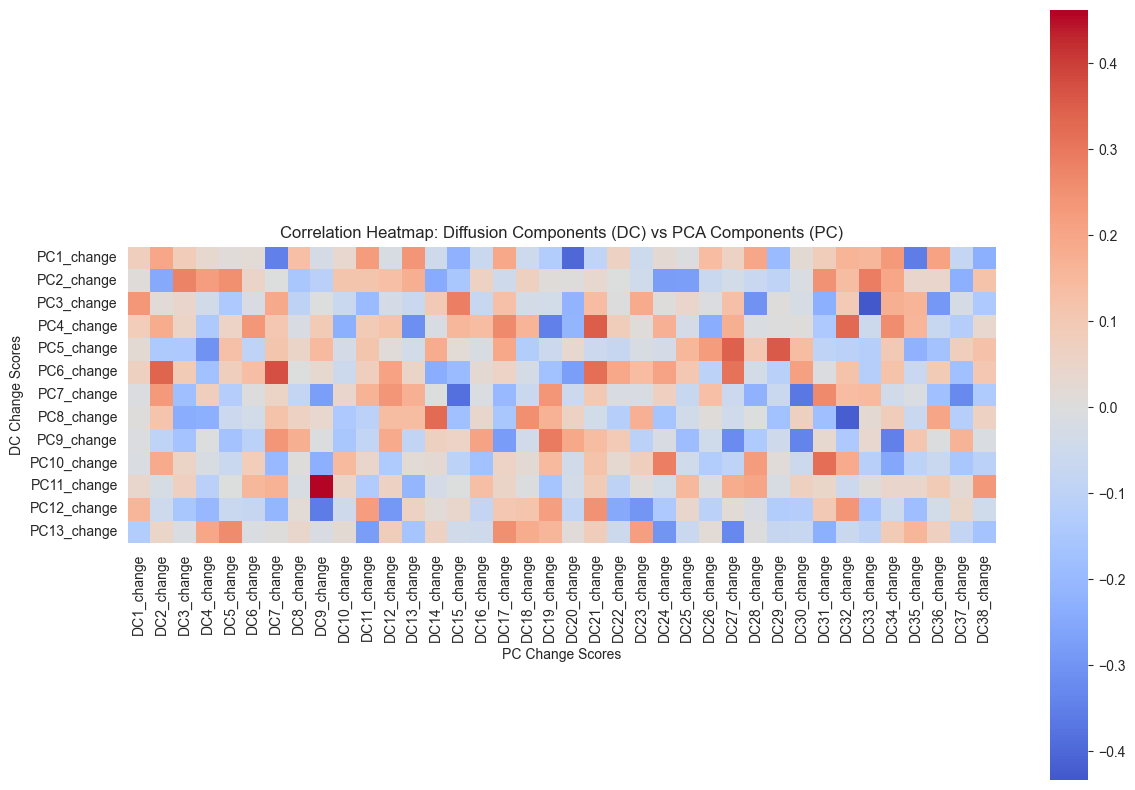

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- assuming you already have merged_df ----
# merged_df must contain columns like:
# DC1_change ... DC39_change
# PC1_change ... PC13_change

# 1. Identify relevant columns
dc_cols = [col for col in merged_df.columns if col.startswith("PC")]
pc_cols = [col for col in merged_df.columns if col.startswith("DC")]

# 2. Compute correlation matrix
corr_matrix = merged_df[dc_cols + pc_cols].corr()

# Extract only the DC ↔ PC block
corr_block = corr_matrix.loc[dc_cols, pc_cols]

# 3. Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_block,
            cmap="coolwarm",
            center=0,
            annot=False,
            square=True)

plt.title("Correlation Heatmap: Diffusion Components (DC) vs PCA Components (PC)")
plt.xlabel("PC Change Scores")
plt.ylabel("DC Change Scores")
plt.tight_layout()
plt.show()

from scipy.stats import pearsonr

pc1 = merged_df["PC1_change"]
dc1 = merged_df["DC1_change"]

corr, pval = pearsonr(pc1, dc1)
print("Correlation:", corr, "p-value:", pval)


In [20]:
import numpy as np

median_val = pc1.median()
group_high = merged_df[pc1 > median_val]["DC1_change"]
group_low = merged_df[pc1 <= median_val]["DC1_change"]

from scipy.stats import ttest_ind
t, p = ttest_ind(group_high, group_low)
print("t-test:", t, "p =", p)


t-test: 0.24488340175956427 p = 0.8078997985018443


 Mantel Test: Brain ↔ Behavior Change
Correlation: -0.00568730192735595
p-value: 0.49135086491350866


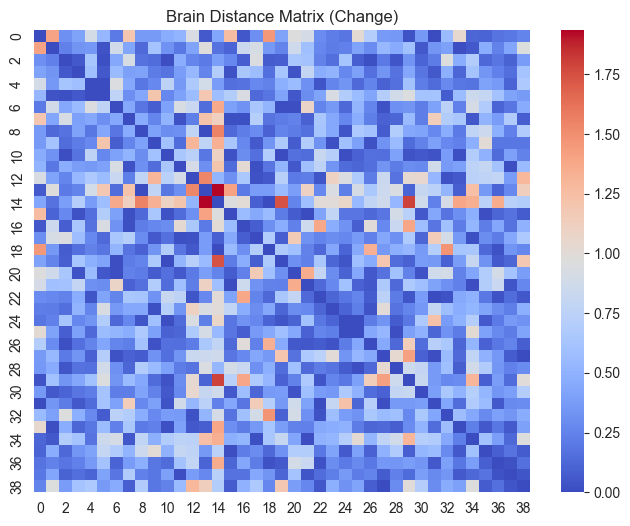

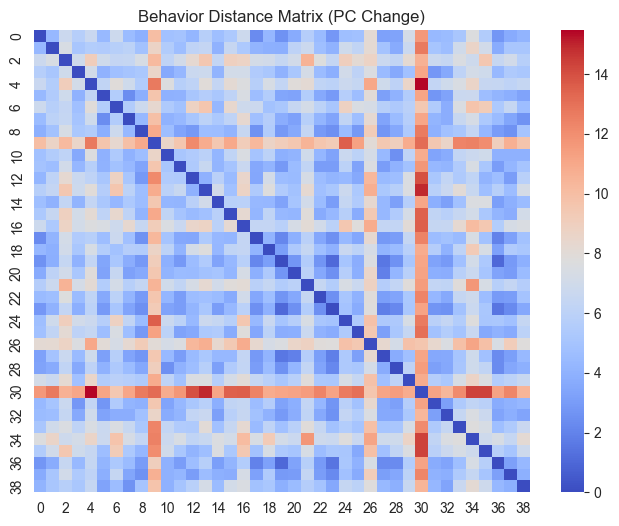

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------
# PURE PYTHON MANTEL TEST (NO SKBIO)
# -------------------------------------------------
def mantel_test(x, y, perms=10000):
    """
    x, y: symmetric square distance matrices
    Returns: mantel_r, p_value
    """
    # Extract upper triangles only
    x_flat = squareform(x)
    y_flat = squareform(y)

    # Observed correlation
    r_obs = pearsonr(x_flat, y_flat)[0]

    # Permutation test
    n = x.shape[0]
    count = 0

    for _ in range(perms):
        perm = np.random.permutation(n)
        y_perm = y[perm][:, perm]   # permute both rows and columns
        r_perm = pearsonr(x_flat, squareform(y_perm))[0]

        if r_perm >= r_obs:
            count += 1

    p_value = (count + 1) / (perms + 1)
    return r_obs, p_value


# -------------------------------------------------
# HELP FUNCTION: Make matrices valid for distance
# -------------------------------------------------
def fix_dist_matrix(M):
    M = np.asarray(M)
    M = (M + M.T) / 2       # enforce symmetry
    np.fill_diagonal(M, 0)  # enforce zero diagonal
    M = np.abs(M)           # enforce non-negative
    return M


# -------------------------------------------------
# 1. LOAD BRAIN DISTANCE MATRICES
# -------------------------------------------------
ses1 = pd.read_csv("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_distances_ses1_labeled_YEO.csv", index_col=0)
ses2 = pd.read_csv("data/YEO_mat_cor/YEO_mat_cor/csv_out/diffusion_distances_ses2_labeled_YEO.csv", index_col=0)

# Clean subject names: remove "_ses1" and "_ses2"
ses1.index = ses1.index.str.split("_").str[0]
ses1.columns = ses1.columns.str.split("_").str[0]
ses2.index = ses2.index.str.split("_").str[0]
ses2.columns = ses2.columns.str.split("_").str[0]

# Keep only subjects that appear in BOTH matrices
common_subs = ses1.index.intersection(ses2.index)
ses1 = ses1.loc[common_subs, common_subs]
ses2 = ses2.loc[common_subs, common_subs]

# -------------------------------------------------
# 2. BRAIN CHANGE MATRIX (ses2 - ses1)
# -------------------------------------------------
brain_change = ses2 - ses1
brain_dist = fix_dist_matrix(brain_change.values)   # fix to valid distance matrix


# -------------------------------------------------
# 3. LOAD BEHAVIORAL PC CHANGE DATAFRAME
# -------------------------------------------------
pc_change = change_df_pca.copy()   # already created earlier
pc_change = pc_change.set_index("Subject_Code")

# Clean subject names same way as brain matrices
pc_change.index = pc_change.index.str.split("_").str[0]

# Align with brain subjects
pc_change = pc_change.loc[common_subs]

# -------------------------------------------------
# 4. COMPUTE PC-BASED SUBJECT × SUBJECT DISTANCES
# -------------------------------------------------
beh_dist = pairwise_distances(pc_change.values, metric="euclidean")
beh_dist = fix_dist_matrix(beh_dist)   # fix to valid distance matrix


# -------------------------------------------------
# 5. RUN MANTEL TEST
# -------------------------------------------------
r, p = mantel_test(brain_dist, beh_dist, perms=10000)

print("====================================")
print(" Mantel Test: Brain ↔ Behavior Change")
print("====================================")
print("Correlation:", r)
print("p-value:", p)


# -------------------------------------------------
# 6. OPTIONAL HEATMAPS
# -------------------------------------------------
plt.figure(figsize=(8,6))
sns.heatmap(brain_dist, cmap="coolwarm")
plt.title("Brain Distance Matrix (Change)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(beh_dist, cmap="coolwarm")
plt.title("Behavior Distance Matrix (PC Change)")
plt.show()
